<h2 style="color: #FF6347;">Importing Necessary Libraries</h2>

In [ ]:
# Basic Libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNet


<h3 style="color: #FF8C00;">Data Extraction</h3>

In [ ]:
from google.colab import drive
import os


drive.mount('/content/drive')

def load_data(dataset_dir):

    empty_folder = os.path.join(dataset_dir, 'empty')
    not_empty_folder = os.path.join(dataset_dir, 'not_empty')

    empty_files = os.listdir(empty_folder)
    not_empty_files = os.listdir(not_empty_folder)


    empty_file_paths = [os.path.join(empty_folder, file) for file in empty_files if file.endswith(('jpg', 'png', 'jpeg'))]
    not_empty_file_paths = [os.path.join(not_empty_folder, file) for file in not_empty_files if file.endswith(('jpg', 'png', 'jpeg'))]


    print(f"Number of empty images: {len(empty_file_paths)}")
    print(f"Number of not_empty images: {len(not_empty_file_paths)}")


    return empty_file_paths, not_empty_file_paths


dataset_dir = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/clf-data/'
folder_path = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/clf-data/'
train_data_dir = folder_path  # All the files (empty and not empty) = training data


data = load_data(dataset_dir)


Mounted at /content/drive
Number of empty images: 3045
Number of not_empty images: 3045


In [ ]:
# Verify the dataset path and structure
print("Dataset path:", folder_path)
print("Contents of dataset_path:", os.listdir(folder_path))

Dataset path: /content/drive/MyDrive/computer_vision/parking_lot_contents/parking/clf-data/
Contents of dataset_path: ['empty', 'not_empty', '.DS_Store']


In [ ]:
batch_size = 32
img_size = (160, 160)

<h3 style="color: #FF8C00;">Train-Test Split:</h3>


In [ ]:
import os
from sklearn.model_selection import train_test_split



def train_test_split_data(dataset_dir, validation_size=0.1, test_size=0.2, random_state=42):

    empty_files, not_empty_files = load_data(dataset_dir)

    train_empty, test_empty = train_test_split(empty_files, test_size=test_size, random_state=random_state)
    train_not_empty, test_not_empty = train_test_split(not_empty_files, test_size=test_size, random_state=random_state)

    train_files = train_empty + train_not_empty
    test_files = test_empty + test_not_empty

    train_labels = [0] * len(train_empty) + [1] * len(train_not_empty)
    test_labels = [0] * len(test_empty) + [1] * len(test_not_empty)

    train_files, val_files, train_labels, val_labels = train_test_split(
        train_files, train_labels, test_size=validation_size, random_state=random_state)


    print("Número de arquivos vazios no conjunto de teste:", len(test_empty))
    print("Número de arquivos não vazios no conjunto de teste:", len(test_not_empty))


    print(f"Treinamento: {len(train_files)} imagens")
    print(f"Validação: {len(val_files)} imagens")
    print(f"Teste: {len(test_files)} imagens")


    return train_files, val_files, test_files, train_labels, val_labels, test_labels



dataset_dir = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/clf-data/'
train_files, val_files, test_files, train_labels, val_labels, test_labels = train_test_split_data(dataset_dir)
train_dataset = dataset_dir



Number of empty images: 3045
Number of not_empty images: 3045
Número de arquivos vazios no conjunto de teste: 609
Número de arquivos não vazios no conjunto de teste: 609
Treinamento: 4384 imagens
Validação: 488 imagens
Teste: 1218 imagens


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_class_names_from_dirs(dataset_dir):
    # acess the class names by the folders
    class_names = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]

    # Ordena as classes, se necessário
    class_names.sort()

    return class_names


def create_image_generators(dataset_dir, target_size=(150, 150), batch_size=32, validation_split=0.1):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)


    train_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    class_names = list(train_generator.class_indices.keys())
    return train_generator, validation_generator, class_names


dataset_dir = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/clf-data/'  # Substitua pelo seu diretório

train_generator, validation_generator, class_names = create_image_generators(dataset_dir)


print(f'Classes: {class_names}')


Found 5482 images belonging to 2 classes.
Found 608 images belonging to 2 classes.
Classes: ['empty', 'not_empty']


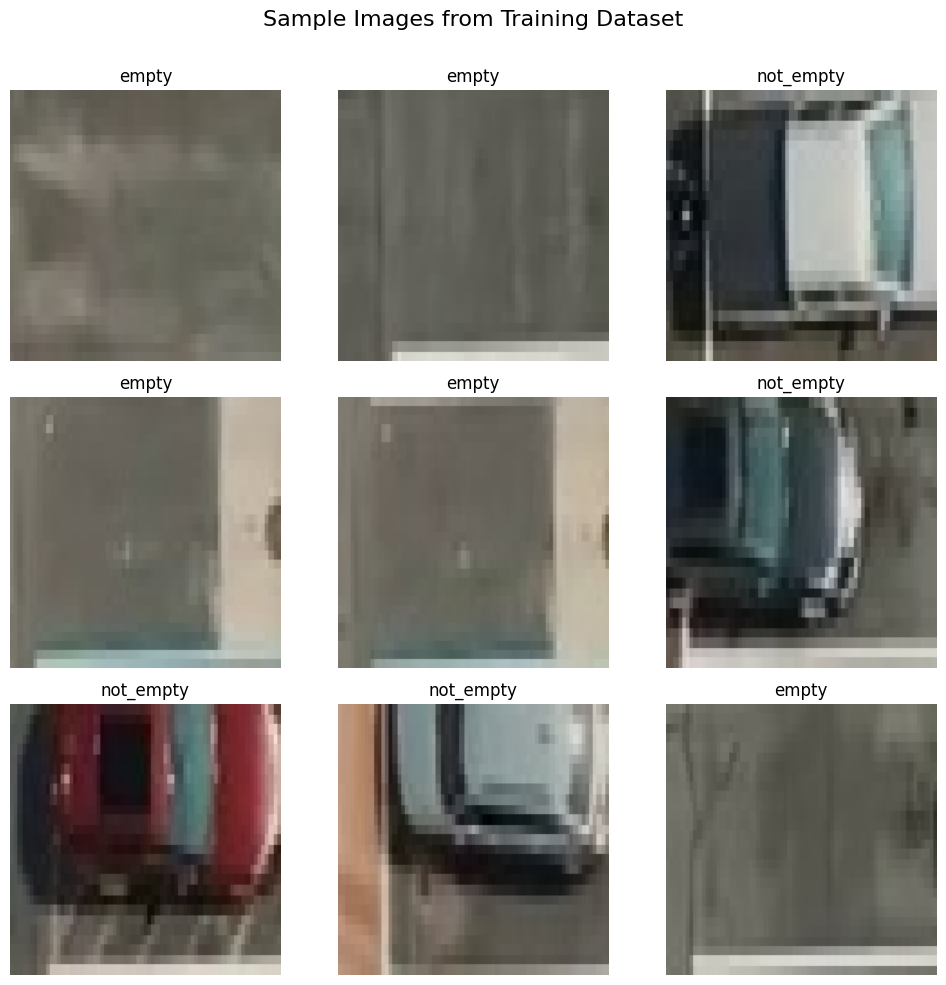

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and their corresponding labels from the train_generator
# The train_generator will yield (images, labels) batches
for images, labels in train_generator:
    plt.figure(figsize=(10, 10))

    # Get the class names (mapping of indices to labels)
    class_names = train_generator.class_indices
    class_names = {v: k for k, v in class_names.items()}  # Reverse the dictionary to map index to class name

    # Display the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Rescale images to the range [0, 255] for proper display if needed
        img = images[i] * 255.0  # Rescale back to [0, 255]
        img = img.astype("uint8")  # Convert to unsigned 8-bit integer

        plt.imshow(img)  # Display the image
        plt.title(class_names[labels[i]])  # Use the label directly, as it is already a NumPy array
        plt.axis("off")

    plt.suptitle("Sample Images from Training Dataset", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Break after one batch (remove this if you want to display more batches)
    break


<h2 style="color: #FF6347;">Preprocessing the Dataset</h2>

Preprocessing is a critical step in preparing the dataset for efficient model training and evaluation.

<h3 style="color: #FF8C00;">Test & Validation Datasets:</h3>

### Calculate the number of validation batches + Spliting validation into 2 subsets : validation and test

In [ ]:
# Calculate the number of validation batches
total_samples = validation_generator.samples
val_batches = (lambda total_samples, batch_size: (total_samples // batch_size) + (1 if total_samples % batch_size != 0 else 0))(validation_generator.samples, validation_generator.batch_size)
# Output the number of batches
print(f"Number of validation batches: {val_batches}")


Number of validation batches: 19


In [ ]:
import tensorflow as tf

def validation_split(validation_generator, test_split=0.2):

    total_samples = validation_generator.samples
    batch_size = validation_generator.batch_size


    val_batches = total_samples // batch_size
    print(f"Total de batches de validação: {val_batches}")


    test_batches = int(test_split * val_batches)
    validation_batches = val_batches - test_batches

    print(f"Total de batches de teste: {test_batches}")
    print(f"Batches restantes para validação: {validation_batches}")




    validation_dataset = tf.data.Dataset.from_generator(
        lambda: (batch for batch in validation_generator),
        output_signature=(
            tf.TensorSpec(shape=(None, *validation_generator.image_shape), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
        )
    )


    test_dataset = validation_dataset.take(test_batches)
    validation_dataset = validation_dataset.skip(test_batches)

    return validation_dataset, test_dataset


train_generator, validation_generator, class_names = create_image_generators(dataset_dir)


validation_dataset, test_dataset = validation_split(validation_generator)

# Agora você pode usar validation_dataset e test_dataset como novos datasets para treinar e avaliar o modelo

Found 5482 images belonging to 2 classes.
Found 608 images belonging to 2 classes.
Total de batches de validação: 19
Total de batches de teste: 3
Batches restantes para validação: 16


## Data Modellig

### Starting Running the first model

In [ ]:
# check the CNN - Test 1
CNN_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmoide para binário
])

# Compilar o modelo
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
CNN_model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // train_generator.batch_size)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 1198s 7s/step - accuracy: 0.9024 - loss: 0.2419
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 114us/step - accuracy: 1.0000 - loss: 0.0021
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


171/171 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9950 - loss: 0.0131
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 63us/step - accuracy: 1.0000 - loss: 9.5816e-05
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 1.0000 - loss: 8.5137e-04
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 86us/step - accuracy: 1.0000 - loss: 2.3246e-05
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 1.0000 - loss: 3.7276e-05
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 71us/step - accuracy: 1.0000 - loss: 6.4186e-06
Epoch 9/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 1.0000 - loss: 1.6983e-05
Epoch 10/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 84us/step - accuracy: 1.0000 - loss: 4.7109e-06


## Starting Running the model 2 with tranfer learning: Mobile net

In [ ]:
# Test .2 mobile Net
# Test .2 mobile Net
# Step 1: Load the pre-trained MobileNet model without the top layers (classification layers)
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import models, layers

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) # Change input shape to (150, 150, 3)
base_model.trainable = False

model = models.Sequential([
    base_model,  # Add the pre-trained base model (MobileNet)
    layers.GlobalAveragePooling2D(),  # Use global average pooling to reduce dimensions
    layers.Dense(128, activation='relu'),  # Add a dense layer for your specific task
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

<ipython-input-11-0924b6cb32a6>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) # Change input shape to (150, 150, 3)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9466 - loss: 0.1042 - val_accuracy: 0.9951 - val_loss: 0.0154
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 1.0000 - loss: 0.0011  
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 140s 733ms/step - accuracy: 1.0000 - loss: 5.1095e-04 - val_accuracy: 0.9951 - val_loss: 0.0119
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 1.0000 - loss: 3.2362e-04  
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 121s 700ms/step - accuracy: 1.0000 - loss: 1.8782e-04 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 171us/step - accuracy: 1.0000 - loss: 1.1277e-04  
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 148s 741ms/step - accuracy: 1.0000 - loss: 9.9298e-05 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 1.0000 - loss: 2.8003e-05   
Epoch 9/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 

## Saving the Model

In [ ]:
# Após o treinamento do modelo:
model.save('modelo_parking_lot.keras')
import os
model_save_dir = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/saved_models'  # Change to your desired path

# Create the directory if it doesn't exist
os.makedirs(model_save_dir, exist_ok=True)

# Save the model to the specified path
model_save_path = os.path.join(model_save_dir, 'modelo_parking_lot.keras')
model.save(model_save_path)

## Evaluation Model : Mobile Net

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_generator = test_datagen.flow_from_directory(
    dataset_dir,  # Use o diretório de dados de teste
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 6090 images belonging to 2 classes.


In [ ]:
# Training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Validation accuracy and loss
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Print the training and validation results for each epoch
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Loss: {train_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")


Training Accuracy: [0.9871559739112854, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Training Loss: [0.028552036732435226, 0.0010666390880942345, 0.0005095969536341727, 0.00032361759804189205, 0.0001910604041768238, 0.00011277406883891672, 9.483945177635178e-05, 2.8002765247947536e-05, 5.861871250090189e-05, 4.111282032681629e-05]
Validation Accuracy: [0.9950658082962036, 0.9950658082962036, 1.0, 1.0, 1.0]
Validation Loss: [0.015382234938442707, 0.011884249746799469, 0.004985432140529156, 0.004068606998771429, 0.003033166751265526]


## Plot of the Test Results for acuracy and loss

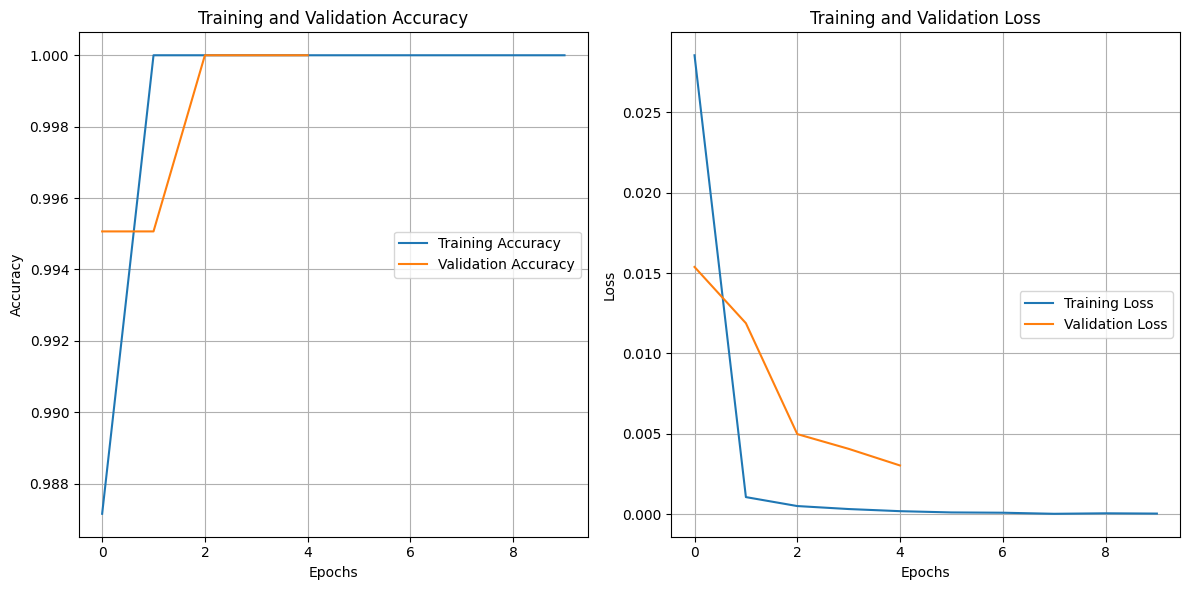

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss on the same grid
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.show()

## Confusion Matrix

In [ ]:
# Gather ground truth and predictions from the test dataset
ground_truth = np.concatenate([labels.numpy() for _, labels in test_dataset])
predictions = np.concatenate([tf.where(model(X).numpy().flatten() < 0.5, 0, 1).numpy() for X, _ in test_dataset])

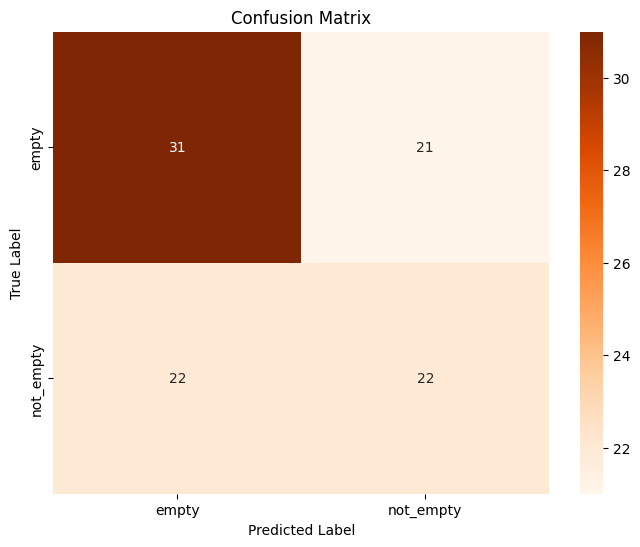

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion a
conf_matrix = confusion_matrix(ground_truth, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(ground_truth, predictions, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

       empty       0.58      0.60      0.59        52
   not_empty       0.51      0.50      0.51        44

    accuracy                           0.55        96
   macro avg       0.55      0.55      0.55        96
weighted avg       0.55      0.55      0.55        96



## Predictions Results Images

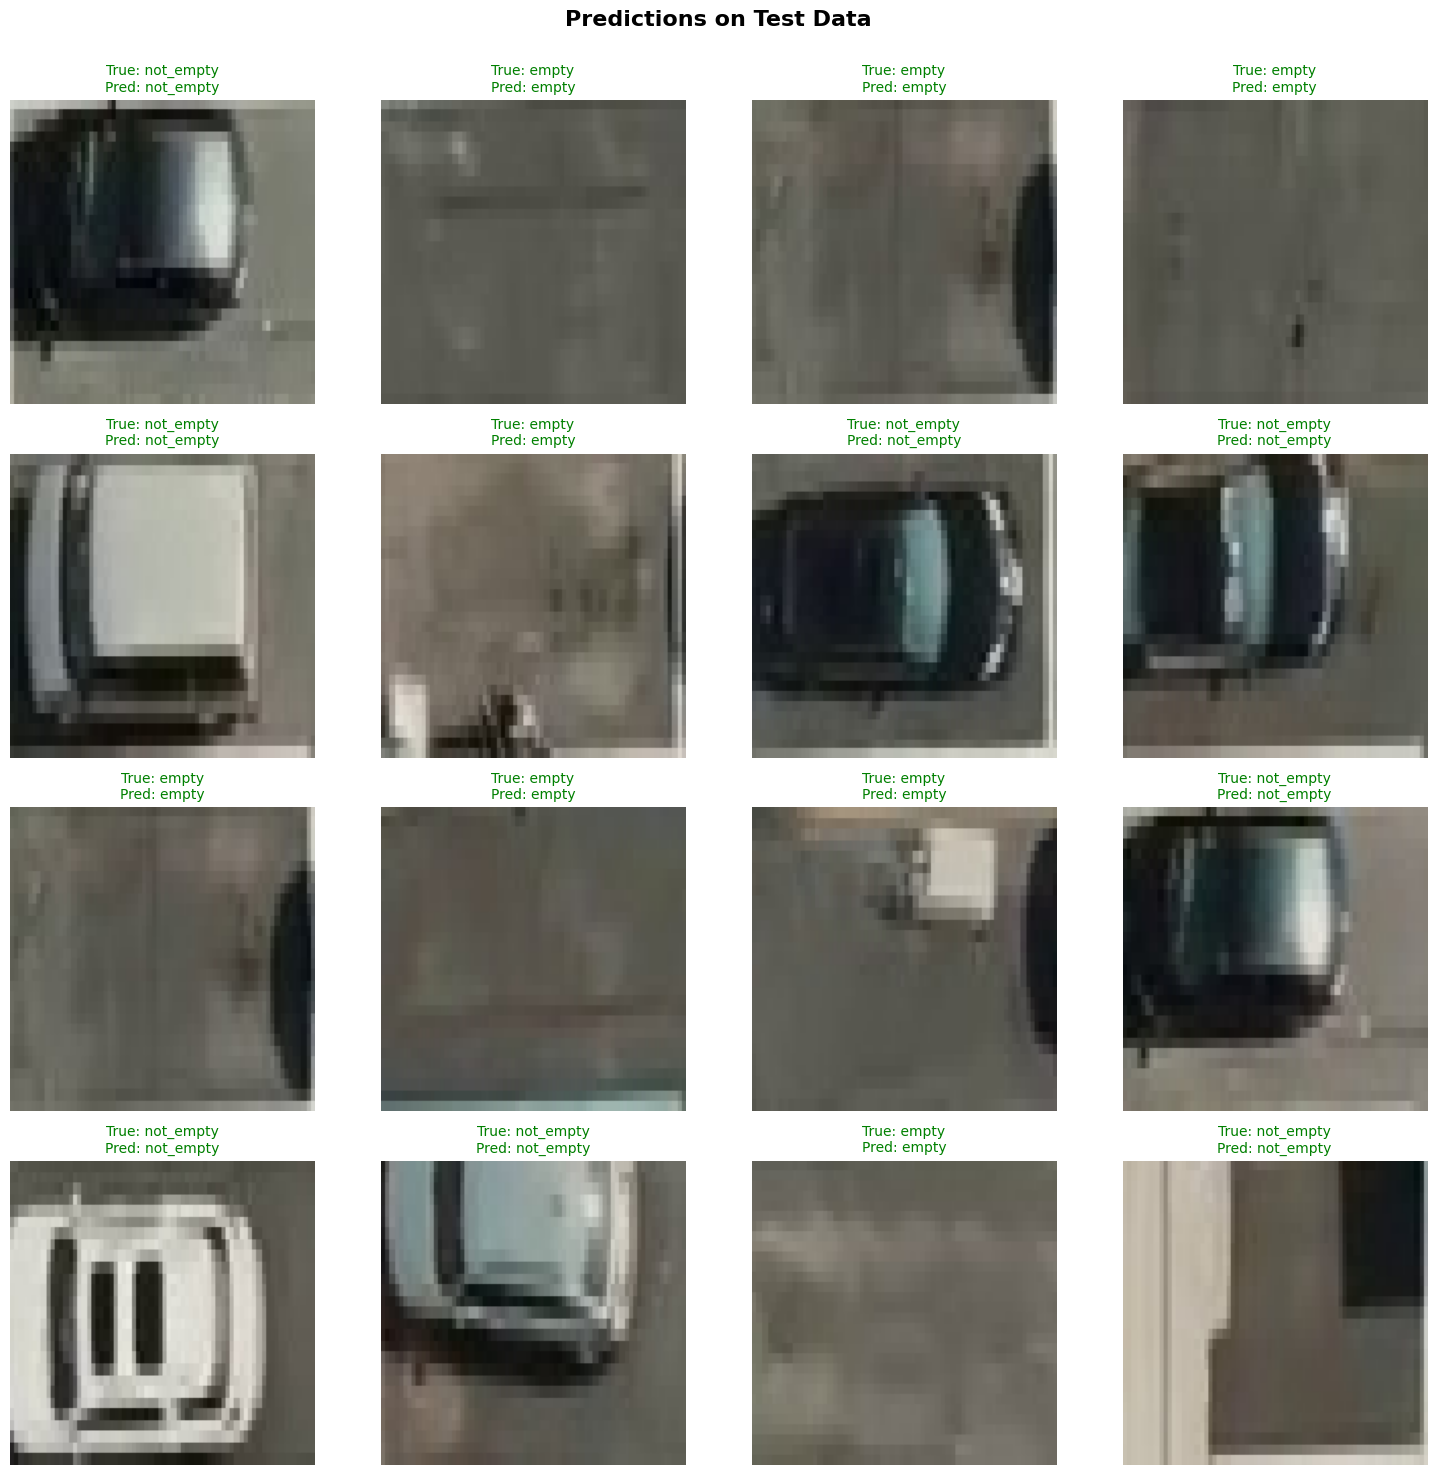

In [ ]:
model_save_dir = "/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/saved_models"
model_path = os.path.join(model_save_dir, "modelo_parking_lot.keras")


model = tf.keras.models.load_model(model_path)


image_batch, label_batch = next(validation_generator)


predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.where(predictions < 0.5, 0, 1).numpy()


plt.figure(figsize=(15, 15))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)  # Grid 4x4


    image = (image_batch[i] * 255).astype("uint8")
    plt.imshow(image)

    true_label = int(label_batch[i])
    pred_label = int(predictions[i])
    title = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}"
    color = 'green' if true_label == pred_label else 'red'
    plt.title(title, color=color, fontsize=10)
    plt.axis("off")

plt.suptitle("Predictions on Test Data", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Video Predictions

### 1. Functions for Boxes detetions for parking lot

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from IPython.display import display, Video

EMPTY = 0
NOT_EMPTY = 1


model_path = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/saved_models/modelo_parking_lot.keras'
MODEL = tf.keras.models.load_model(model_path)


def get_parking_spots_bboxes(connected_components):
    num_labels, labels = connected_components

    slots = []
    for i in range(1, num_labels):
        x1, y1, w, h = cv2.boundingRect((labels == i).astype(np.uint8))
        slots.append([x1, y1, w, h])

    return slots

def empty_or_not(spot_bgr):
    flat_data = []


    img_resized = cv2.resize(spot_bgr, (150, 150))


    img_resized = np.expand_dims(img_resized, axis=0)
    img_resized = img_resized / 255.0

    y_output = MODEL.predict(img_resized)


    if y_output[0] == 0:
        return EMPTY
    else:
        return NOT_EMPTY

# Displaying the FRAME Video and aplying the model MOBILE NET

Vídeo carregado com sucesso!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step


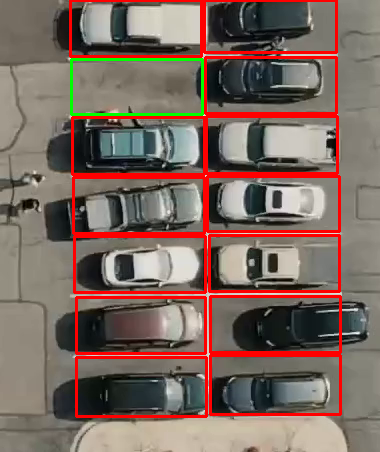

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

EMPTY = 0
NOT_EMPTY = 1


model_path = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/saved_models/modelo_parking_lot.keras'
MODEL = tf.keras.models.load_model(model_path)

def get_parking_spots_bboxes(connected_components):
    num_labels, labels = connected_components

    slots = []
    for i in range(1, num_labels):
        x1, y1, w, h = cv2.boundingRect((labels == i).astype(np.uint8))
        slots.append([x1, y1, w, h])

    return slots


mask_path = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/mask_crop.png'
mask = cv2.imread(mask_path, 0)


video_path = '/content/drive/MyDrive/computer_vision/parking_lot_contents/parking/parking_crop_loop.mp4'
cap = cv2.VideoCapture(video_path)


connected_components = cv2.connectedComponents(mask, 4, cv2.CV_32S)
num_labels, labels = connected_components
spots = get_parking_spots_bboxes(connected_components)


if not cap.isOpened():
    print("Erro ao abrir o vídeo. Verifique o caminho do arquivo.")
else:
    print("Vídeo carregado com sucesso!")


batch_size = 64


ret = True
final_frame = None

while ret:
    ret, frame = cap.read()
    if not ret:
        break


    spot_crops_batch = []
    for spot in spots:
        x1, y1, w, h = spot


        spot_crop = frame[y1:y1 + h, x1:x1 + w, :]
        spot_crops_batch.append(spot_crop)


        if len(spot_crops_batch) == batch_size or spot == spots[-1]:

            spot_crops_batch_preprocessed = [
                cv2.resize(spot, (150, 150)) / 255.0 for spot in spot_crops_batch
            ]
            spot_crops_batch_preprocessed = np.array(spot_crops_batch_preprocessed)


            spot_status_batch = MODEL.predict(spot_crops_batch_preprocessed)
            spot_status_batch = (spot_status_batch.flatten() > 0.5).astype(int)  # 0 ou 1


            for i, spot in enumerate(spots[:len(spot_crops_batch)]):
                x1, y1, w, h = spot
                spot_status = spot_status_batch[i]
                if spot_status == EMPTY:
                    frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)  # Verde
                else:
                    frame = cv2.rectangle(frame, (x1, y1), (x1 + w, y1 + h), (0, 0, 255), 2)  # Vermelho

            spot_crops_batch = []


    final_frame = frame
    break

if final_frame is not None:
    cv2_imshow(final_frame)


cap.release()

## Displaying the Video with the Model